# The Sparks Foundation
GRIP ( Graduate Rotational Internship Program) April 2024

#### By Aditya Kumar Gupta

# Data Science And Business Analytics

# Task 6

Prediction using Decision Tree Algorithm  

# Problem Statement
• Create the Decision Tree classifier and visualize it graphically.

• The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as sm
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
data = pd.read_csv(r"C:\Users\adity\Downloads\Iris (1).csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Cleaning and Understanding the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Checking for the null values.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Descriptive analysis of the Dataset.
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Average Sepal Length 5.8433 & Average Sepal Width 3.0540

Average Petal Length 3.7586 & Average Petal Width 1.1986

# Droping Unnecessary Column

In [6]:
data.drop(labels = 'Id', axis = 1 , inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Checking correlation 
Numeric_cols = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
correlation = Numeric_cols.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


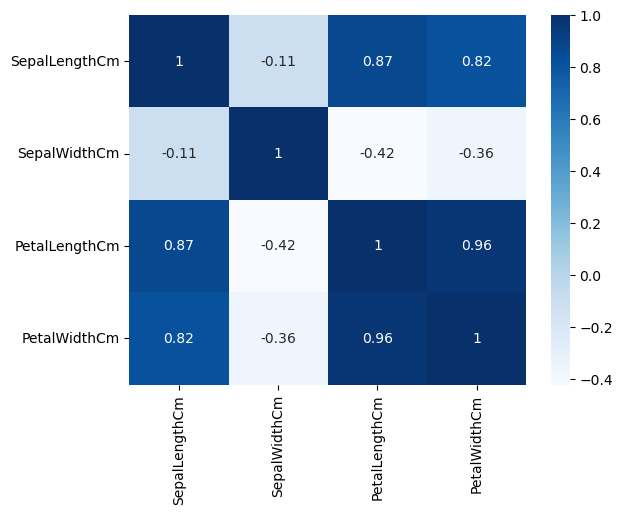

In [8]:
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Blues')
plt.show()

From the above Heat map it is evident that there is a strong positive correlation between Petal Length (cm) and Sepal Length (cm), and a weak negative correlation between Mofe and Sep In summary, there is a positive correlation between Width (cm) and Petal Width (cm) with Sepal Length (cm) and a less significant negative correlation between the two.

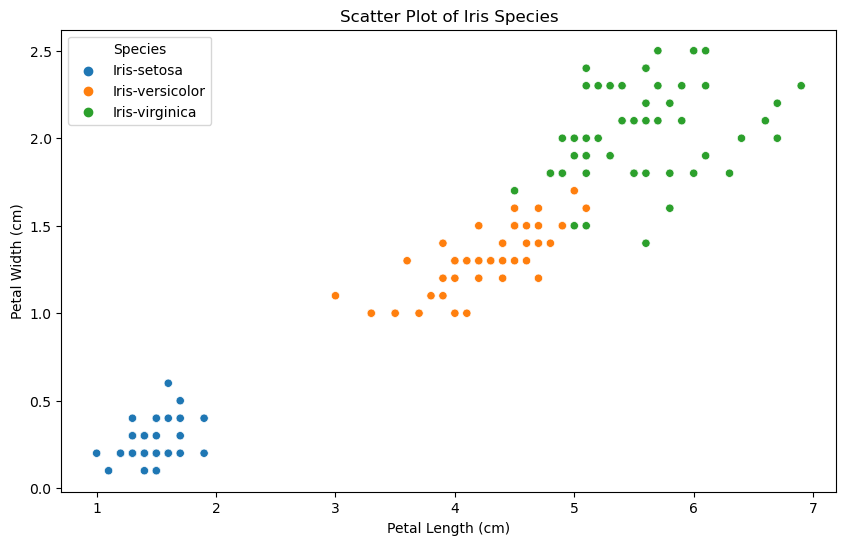

In [9]:
# Plotting Scatter plot of Species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.title("Scatter Plot of Iris Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

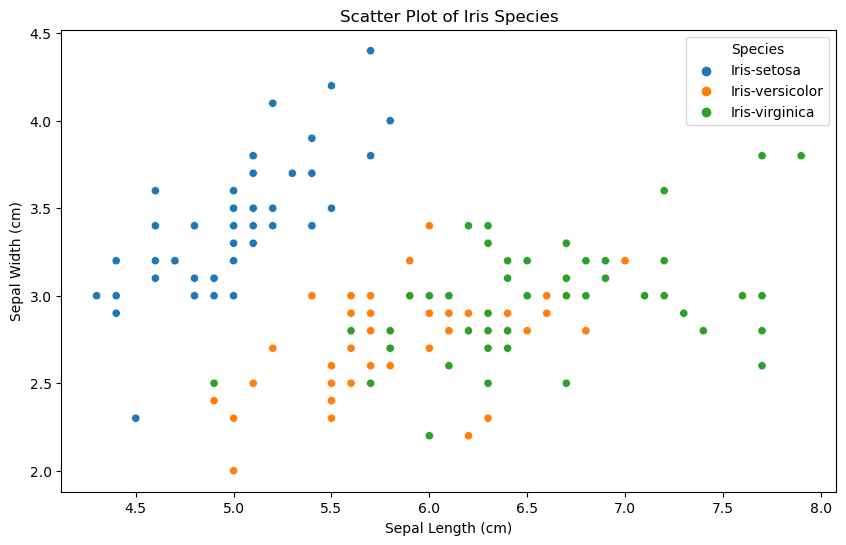

In [10]:
# Plotting Scatter plot of Species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.title("Scatter Plot of Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

# Performing Decision Tree

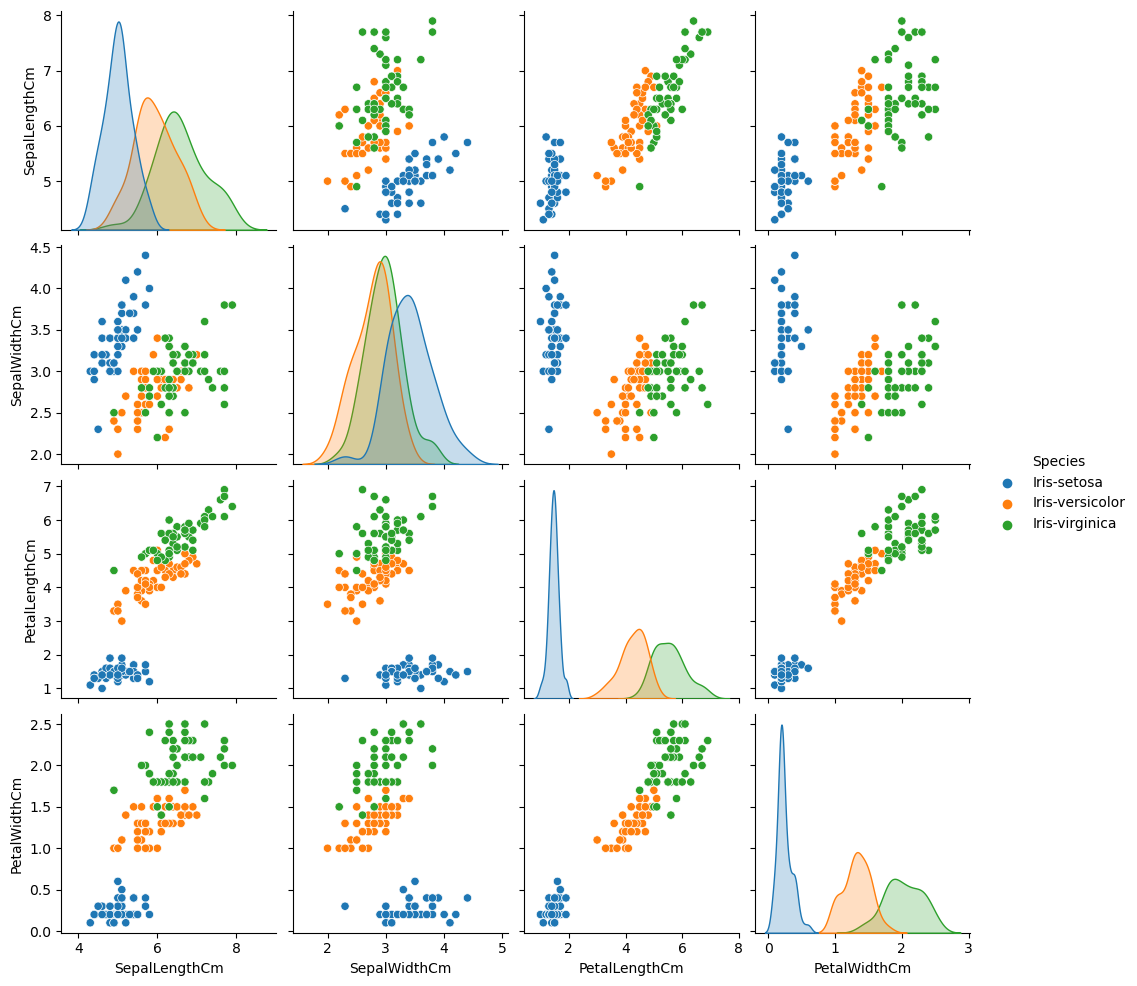

In [12]:
# Visualize the data
sns.pairplot(data, hue='Species')
plt.show()

In [13]:
# Split the data into features and target
X = data.drop('Species', axis=1)
y = data['Species']

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create the Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Train the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Make predictions on the test set
y_pred = dt_clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


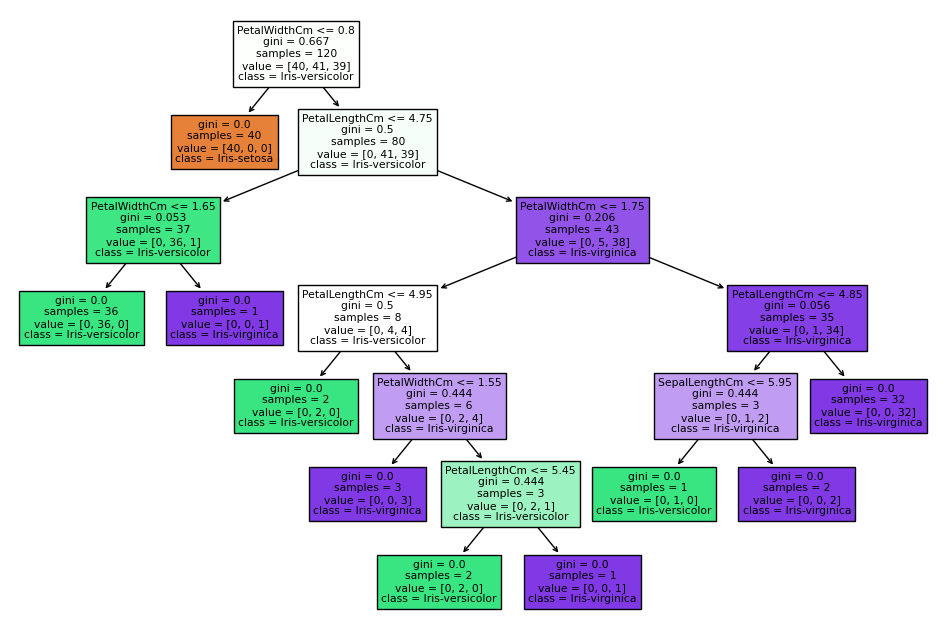

In [18]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(dt_clf, feature_names=list(X.columns), class_names=list(data['Species'].unique()), filled=True)
plt.show()

In [19]:
# To predict a new instance
new_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = dt_clf.predict(new_data)
print(f'Predicted class: {prediction[0]}')

Predicted class: Iris-setosa
